#### Fashion MNIST

In [1]:
# MNIST는 머신러닝의 고전적인 문제로 손으로 쓴 숫자 글씨를 모아놓은 데이터세트이다.
# FASHION MNIST는 MNIST의 영향을 받아서 만들어진 데이터세트로 손글씨가 아닌 옷과 신발 가방등의 이미지들을
# 모아놓았다. Grayscale Image라는 점과 범주 수가 10개라는 점, 각 이미지의 크기가 28*28 pixel이라는 점은
# MNIST와 동일하지만 좀 더 어려운 문제로 평가된다.
# 0(티셔츠/상의), 1(바지), 2(스웨터), 3(드레스), 4(코트), 5(샌들), 6(셔츠), 7(운동화), 8(가방), 9(부츠)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
# Fashion MNIST Dataset 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(f"train_X의 shape : {train_X.shape},   train_Y의 shape : {train_Y.shape}\n\
test_X의 shape  : {test_X.shape},   test_Y의 shape  : {test_Y.shape}")

train_X의 shape : (60000, 28, 28),   train_Y의 shape : (60000,)
test_X의 shape  : (10000, 28, 28),   test_Y의 shape  : (10000,)


In [5]:
# Fashion MNIST 범주들 번호와 매칭하는 dictionary 만들기

fashion_mnist_category_dict = {0 : '티셔츠/상의', 1 : '바지', 2 : '스웨터', 3 : '드레스', 4 : '코트', 
                               5 : '샌들', 6 : '셔츠', 7 : '운동화', 8 : '가방', 9 : '부츠'}

print(fashion_mnist_category_dict)

{0: '티셔츠/상의', 1: '바지', 2: '스웨터', 3: '드레스', 4: '코트', 5: '샌들', 6: '셔츠', 7: '운동화', 8: '가방', 9: '부츠'}


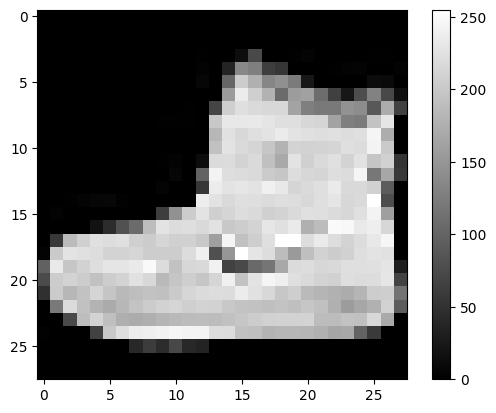

이 이미지는 부츠이다.


In [12]:
img_no = int(input("원하시는 이미지 번호을 선택하세요 : "))

plt.imshow(train_X[img_no], cmap='gray')
plt.colorbar()
plt.show()

print(f"이 이미지는 {fashion_mnist_category_dict[train_Y[img_no]]}이다.")